# Import Libraries

In [1]:
# Command Print Use Coloers 
from termcolor import cprint

# Working With DataFrame
import pandas as pd

# Python Structs Type For Wide Variety Mathematical Operations Like Arrays
import numpy as np
# Libraries For Createing Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Create Table
import csv

# Loading File To DataSet 

In [2]:
# Load The CSV To DataFrame
dataset = pd.read_csv("BitData_Final.csv")

In [3]:
#Cheak DataFarme Size - Supposed to be (3560,12)
cprint("The DataSet Shape Is:", "blue")
cprint(dataset.shape,"blue")

#Check Empty Cells  
print(dataset.info())
cprint("No Emtey Values", "blue")

The DataSet Shape Is:
(3560, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    3560 non-null   object 
 1   OPEN                    3560 non-null   float64
 2   HIGH                    3560 non-null   float64
 3   LOW                     3560 non-null   float64
 4   CLOSE                   3560 non-null   float64
 5   VOLUME                  3560 non-null   float64
 6   MEAN HIGH-LOW           3560 non-null   float64
 7   MEAN CLOSE-OPEN         3560 non-null   float64
 8   TRENDS MEAN             3560 non-null   float64
 9   UP|DOWN                 3560 non-null   object 
 10  POSITVE ANALZE TWEETS   3560 non-null   int64  
 11  NEGATIVE ANALZE TWEETS  3560 non-null   int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 333.9+ KB
None
No Emtey Values


# Converting Values From Categories Into Numbers 

In [4]:
# Convertion Object Columns From Categroys Into Ints 
df2 = dataset.copy()
replace_map ={'UP': 1, 'DOWN':0}
df2.replace(replace_map, inplace=True)

In [5]:
#Delete Columns Which Not Helping For The MechineLearn Stages
df2 = df2.drop(['DATE'], axis=1) 
df2 = df2.drop(['VOLUME'], axis=1)

# Describe Pandas_Dataset

In [6]:
print("Describe:")
print(dataset.describe(include='all'))

Describe:
              DATE          OPEN          HIGH           LOW         CLOSE  \
count         3560   3560.000000   3560.000000   3560.000000   3560.000000   
unique        3560           NaN           NaN           NaN           NaN   
top     2021-12-29           NaN           NaN           NaN           NaN   
freq             1           NaN           NaN           NaN           NaN   
mean           NaN   8045.348305   8243.914919   7834.184952   8059.038460   
std            NaN  14319.309021  14660.922555  13944.627057  14336.467217   
min            NaN      2.220000      2.270000      2.220000      2.240000   
25%            NaN    257.767500    266.580000    252.612500    258.947500   
50%            NaN   1029.500000   1052.500000   1006.500000   1033.000000   
75%            NaN   8762.500000   8918.000000   8543.500000   8761.750000   
max            NaN  67622.000000  68858.000000  66464.000000  67601.000000   

               VOLUME  MEAN HIGH-LOW  MEAN CLOSE-OPEN

# Adding Percent (%) Column Into df(2) 

In [7]:
# Adds Percent Column Into Data_Set
CHANGE = []
index = 1
for i in range(0, len(df2['CLOSE'])-1):
    CHANGE.append((df2['CLOSE'][i] - df2['CLOSE'][index]) / df2['CLOSE'][index])
    index +=1
CHANGE.append(0)
df2["CHANGE"] = CHANGE

# Oultliers Dropping 

In [8]:
import warnings

In [9]:
#Do not show warnings
warnings.filterwarnings("ignore")

Our Date is Time_Series So We are looking For Outliers With %


<AxesSubplot:xlabel='CHANGE'>

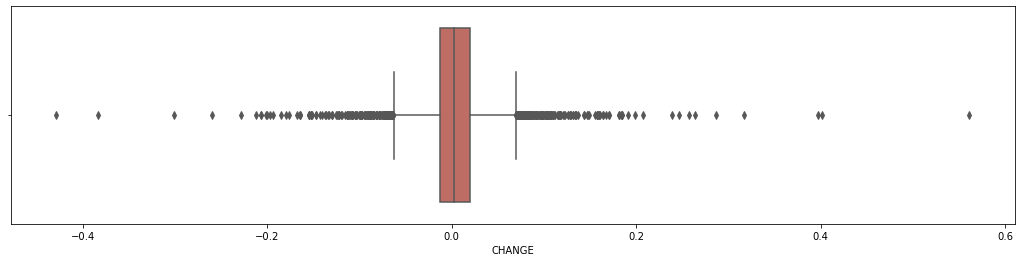

In [10]:
cprint("Our Date is Time_Series So We are looking For Outliers With %", "blue")

outliers_length = plt.figure(figsize=(18, 4))
sns.boxplot(df2['CHANGE'], whis=1.5, color="#CD6155")

In [15]:
#define array of data
Q1 = np.percentile(df2['CHANGE'], 25)
Q3 = np.percentile(df2['CHANGE'], 75)
IQR = Q3 - Q1

#display interquartile range 
outliers1 = df2[(df2['CHANGE'] < Q1 -1.5*IQR) | (df2['CHANGE'] > Q3 +1.5*IQR)].index


In [16]:
df2

,OPEN,HIGH,LOW,CLOSE,MEAN HIGH-LOW,MEAN CLOSE-OPEN,TRENDS MEAN,UP|DOWN,POSITVE ANALZE TWEETS,NEGATIVE ANALZE TWEETS,CHANGE
0,47666.00,48264.00,46982.00,47896.00,47623.0,47781.0,99.000000,1,29,10,0.002659
1,50808.00,50808.00,47602.00,47769.00,49205.0,49288.5,99.500000,0,29,10,-0.063885
2,51041.00,52191.00,50846.00,51029.00,51518.5,51035.0,98.000000,0,28,10,-0.000176
3,50770.00,51407.00,50016.00,51038.00,50711.5,50904.0,98.500000,1,28,10,0.005180
4,51249.00,51437.00,50751.00,50775.00,51094.0,51012.0,100.000000,0,29,10,-0.005114
...,...,...,...,...,...,...,...,...,...,...,...
3555,11.70,11.70,11.70,11.70,11.0,11.0,93.333333,1,34,6,0.000000
3556,11.70,11.70,11.70,11.70,11.0,11.0,89.500000,1,33,6,0.000000
3557,11.70,11.70,11.70,11.70,11.0,11.0,91.000000,1,34,6,0.000855
3558,11.85,11.85,11.15,11.69,11.0,11.0,91.000000,0,34,6,0.072477


In [ ]:
# Cleaning Data From Stage Outliers_Data 
df2.drop(labels=outliers1, inplace=True)

In [ ]:
# Save new CSV After Cleaning Stage
df2.to_csv('Bit_AfterClean.csv')